<a href="https://colab.research.google.com/github/sugiyama404/ObjectDetection/blob/main/ESRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

origin_picture_path = '/content/drive/MyDrive/ObjectDetective/dataset/movie/original_picture'
esrgan_picture_path = '/content/drive/MyDrive/ObjectDetective/dataset/movie/esrgan_picture'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# パスから画像を読み込み、モデルに対応するための前処理を行います。
def preprocess_image(image_path):
    hr_image = tf.image.decode_image(tf.io.read_file(image_path))
    #  PNGの場合は、アルファチャンネルを削除します。このモデルでは、3つのカラーチャンネルを持つ画像のみをサポートしています。
    if hr_image.shape[-1] == 4:
        åhr_image = hr_image[...,:-1]
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)

# スケーリングされていないTensor Imageを保存します。
def save_image(image, filename):
    if not isinstance(image, Image.Image):
        image = tf.clip_by_value(image, 0, 255)
        image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    image.save("%s.jpg" % filename)

In [ ]:
# イメージテンソルからイメージをプロットします。
def plot_image(image, title=""):
    image = np.asarray(image)
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)

In [ ]:
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(SAVED_MODEL_PATH)

Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB



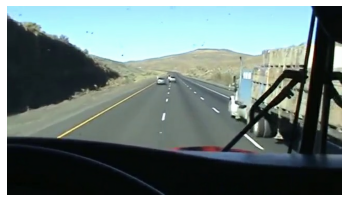

In [ ]:
# 超解像画像のプロッティング
for n in range(850, 1100):
    #IMAGE_PATH = "1912.jpg"
    IMAGE_PATH = f'{origin_picture_path}/{n:04d}.jpg'
    hr_image = preprocess_image(IMAGE_PATH)
    fake_image = model(hr_image)
    fake_image = tf.squeeze(fake_image)
    plot_image(tf.squeeze(fake_image))
    save_image(tf.squeeze(fake_image), filename = f'{esrgan_picture_path}/{n:04d}.jpg')